In [1]:
#importing libraries and datasets
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
delivery_df = pd.read_csv(r"C:\Users\Admin\Desktop\Assignment/delivery_time.csv")

In [2]:
#checking
delivery_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#Renaming column so it will be easy to call
delivery_df=delivery_df.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [4]:
#checking
delivery_df.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#finding correlation
delivery_df.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [7]:
#it has high correlation so we can move forward

<AxesSubplot:xlabel='dt', ylabel='Density'>

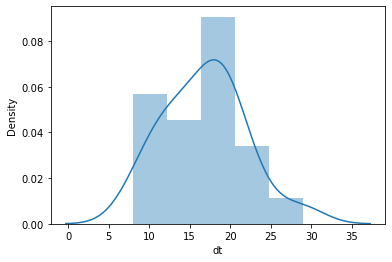

In [8]:
sns.distplot(delivery_df['dt']) #for seeing the distribution of data

<AxesSubplot:xlabel='st', ylabel='Density'>

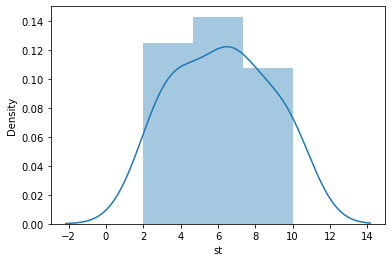

In [9]:
sns.distplot(delivery_df['st'])

In [10]:
#Fitting a Linear Regression Model
import statsmodels.formula.api as smf
model=smf.ols("dt~st",data=delivery_df).fit()

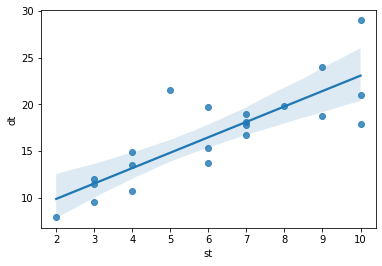

In [11]:
sns.regplot(x="st", y="dt", data=delivery_df);#regplot() method is used to plot data and a linear regression model fit

In [12]:
#Coefficients
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [15]:
#Predict delivery time for sorting time of 11 and 15
newdata=pd.Series([11,15])

In [16]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [17]:
model.predict(data_pred)

0    24.721953
1    31.318032
dtype: float64